In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'dataset/train'
valid_path = 'dataset/val'

In [3]:
# add preprocessing layer to the front of VGG
mn = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in mn.layers:
  layer.trainable = False

In [4]:
# useful for getting number of classes
folders = glob('dataset/train/*')
folders

['dataset/train\\chris_evans',
 'dataset/train\\chris_hemsworth',
 'dataset/train\\mark_ruffalo',
 'dataset/train\\robert_downey_jr',
 'dataset/train\\scarlett_johansson']

In [5]:
# our layers - you can add more if you want
x = Flatten()(mn.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [6]:
# create a model object
model = Model(inputs=mn.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [7]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('dataset/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 217 images belonging to 5 classes.
Found 57 images belonging to 5 classes.


In [9]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\rohit\AppData\Local\Temp\ipykernel_11780\1138423934.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/25
7/7 [==============================] - 8s 973ms/step - loss: 11.5235 - accuracy: 0.3779 - val_loss: 2.0884 - val_accuracy: 0.7018
Epoch 2/25
7/7 [==============================] - 6s 884ms/step - loss: 1.9338 - accuracy: 0.7235 - val_loss: 2.4360 - val_accuracy: 0.6667
Epoch 3/25
7/7 [==============================] - 6s 877ms/step - loss: 1.2035 - accuracy: 0.8525 - val_loss: 1.4110 - val_accuracy: 0.7719
Epoch 4/25
7/7 [==============================] - 6s 874ms/step - loss: 0.4760 - accuracy: 0.9124 - val_loss: 0.4250 - val_accuracy: 0.8947
Epoch 5/25
7/7 [==============================] - 6s 876ms/step - loss: 0.0663 - accuracy: 0.9770 - val_loss: 0.8913 - val_accuracy: 0.8772
Epoch 6/25
7/7 [==============================] - 6s 885ms/step - loss: 0.1170 - accuracy: 0.9631 - val_loss: 0.3158 - val_accuracy: 0.8947
Epoch 7/25
7/7 [==============================] - 6s 902ms/step - loss: 0.0562 - accuracy: 0.9862 - val_loss: 0.3843 - val_accuracy: 0.9123
Epoch 8/25
7/7 [===

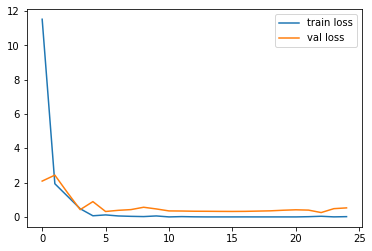

In [13]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')



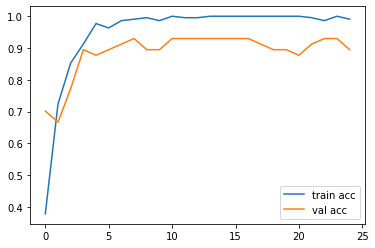

In [14]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')


In [15]:
import tensorflow as tf

from keras.models import load_model

model.save('Saved Models/facefeatures_new_model_MobileNet.h5')